## This notebook looks at impacts from spatio-temporally compounding events, or events that affect the same exposure points in the same year. The way that these impacts are calculated is by taking the yearly impact matrix, suming the impact at each exposure point and masking any point which is not affected within that year by both hazards 

In [1]:
from climada.engine import Impact

import sys
from pathlib import Path

# Add the target directory to sys.path
sys.path.append("../../python_scripts")

# Now you can import the config module
from config import BASE_DIR

In [ ]:
import itertools
from climada.engine import Impact
from pathlib import Path
BASE_DIR = Path("/nfs/n2o/wcr/szelie/multi_risk_data")

country = 'global'
warming_levels = ['1', '2']
impact_dir = BASE_DIR / 'impact_compound/global/csv'
    
exposures = ['assets', 'pop']
hazards = ['TC', 'RF']
combinations = list(itertools.combinations(hazards, 2))

impact_combined_ordered = {warming: {exposure: {combi: 
                   Impact.from_csv(impact_dir / exposure /
                       "".join([exposure,"_combined_impact_ordered_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

impact_combined = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       impact_dir / exposure / "".join([exposure,"_combined_impact_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

In [ ]:
# Helper function to construct file path
from config import BASE_DIR
BASE_DIR = Path("/nfs/n2o/wcr/szelie/multi_risk_data")
impact_dir = BASE_DIR / 'impact_yearsets/global/csv'

country = 'global'
warming_levels = ['1', '2']
exposures = ['assets', 'pop']
hazards = ['TC', 'RF']
from climada.engine import Impact

def get_file_path(exposure, hazard, warming, country, capped):
    cap_suffix = "_caped" if capped else ""
    filename = f"{exposure}/{hazard}_{exposure}_impacts_yearsets_150arcsec_{warming}_{country}{cap_suffix}.csv"
    return impact_dir / filename

# Function to load impacts into a nested dictionary structure
def load_impacts(capped):
    return {
        warming: {
            exposure: {
                hazard: Impact.from_csv(get_file_path(exposure, hazard, warming, country, capped))
                for hazard in hazards
            } for exposure in exposures
        } for warming in warming_levels
    }

# Load both capped and not capped impacts
impacts_yearsets = load_impacts(capped=True)


In [13]:
from multi_risk import *


## Effect of climate change on spatio-temporally compounding impacts

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu


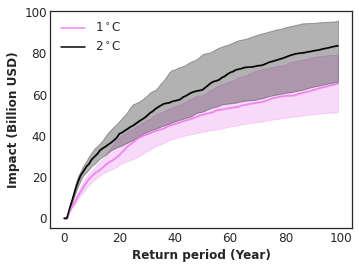

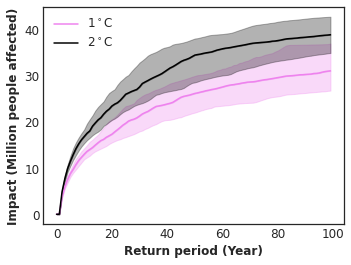

In [14]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12


aai = {}
y100 = {}


colors = {'1':'lightblue', '2':'plum', '3':'black'}
factor_dict = {"assets":1e9, "pop":1e6}
ylabel = {"assets":"Impact (Billion USD)","pop":"Impact (Million people affected)"}


for exposure in ["assets", "pop"]:
    aai[exposure] = {}
    y100[exposure] = {}
    fig,ax = plt.subplots(figsize=(5.4,4))

    fq_list, return_per =  make_fq_list(impact_combined_ordered['1'][exposure][('TC', 'RF')],  factor=factor_dict[exposure])
    plot_return_period_samples(fq_list, return_per, ax, color="Violet", label="1$^\circ$C", range=True)
    y100[exposure]['1'] = np.median(fq_list, axis=0)[-1]
    aai[exposure]['1'] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))

    
    fq_list, return_per =  make_fq_list(impact_combined_ordered['2'][exposure][('TC', 'RF')], factor=factor_dict[exposure])
    plot_return_period_samples(fq_list, return_per, ax, color="black", label="2$^\circ$C", range=True)
    y100[exposure]['2'] = np.median(fq_list, axis=0)[-1]
    aai[exposure]['2'] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))


    #ax.set_ylabel(ylabel[exposure])
    ax.set_xlabel("Return period (Year)")
    
    ax.set_ylabel(ylabel[exposure])

    #plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/compound_ordered_cc_'+exposure+'.pdf', bbox_inches='tight')

    #ax.set_title(" ".join([haz, exposure]))
        
        

In [7]:
cc_100y = {exp:{warming:{'imp':(y100_aai[exp][warming] - y100_aai[exp]['1'])/y100_aai[exp]['1']}
                for warming in y100_aai[exp]} \
     for exp in y100_aai}       


cc_aai = {exp:{warming:{'imp':(aai[exp][warming] - aai[exp]['1'])/aai[exp]['1']\
                                          }for warming in aai[exp]} \
     for exp in aai}  

In [8]:
cc_100y

{'assets': {'1': {'imp': 0.0}, '2': {'imp': 0.27480689620044585}},
 'pop': {'1': {'imp': 0.0}, '2': {'imp': 0.24349419414080156}}}

In [ ]:
cc_aai

{'assets': {'1': {'imp': 0.0}, '2': {'imp': 0.2846261431705611}},
 'pop': {'1': {'imp': 0.0}, '2': {'imp': 0.28680895264671447}}}

## Effect of common physical drivers on spatio-temporally compounding impacts

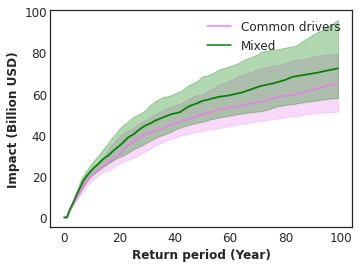

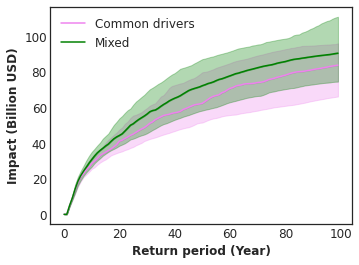

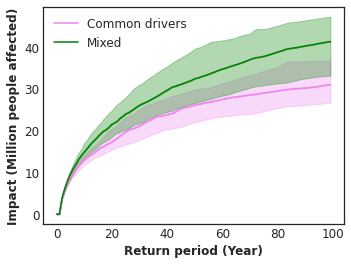

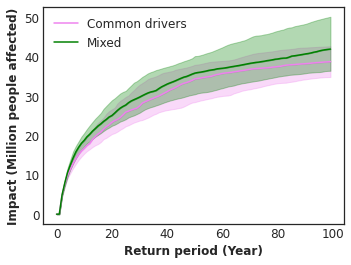

In [17]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

fq_single_hazard = {}
aai_single_hazard = {}

y100_single_hazard = {}



colors = {'1':'lightblue', '2':'plum', '3':'black'}

for exposure in ["assets", "pop"]:
    for warming in ["1","2"]:
        fig,ax = plt.subplots(figsize=(5.4,4))

        fq_list, return_per =  make_fq_list(impact_combined_ordered[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list, return_per, ax, color="Violet", label="Common drivers", range=True)

        fq_list_rf, return_per =  make_fq_list(impact_combined[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list_rf, return_per, ax, color="green", label="Mixed", range=True)

        ax.set_xlabel("Return period (Year)")
        ax.set_ylabel(ylabel[exposure])
        #plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/compound_ordered_vs_random_'+exposure+'_'+warming+'.pdf', bbox_inches='tight')

        #ax.set_title(" ".join([haz, exposure]))

        

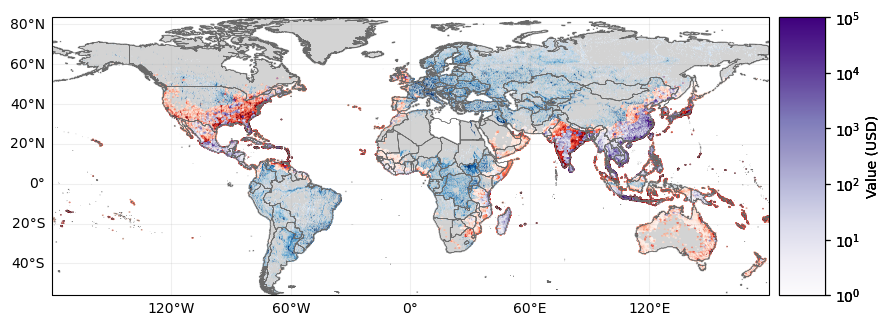

In [37]:
import matplotlib
import matplotlib.pyplot as plt

cmap_copy = plt.cm.get_cmap('Blues').copy()
cmap_copy.set_under('lightgray', alpha=1)

ax = impacts_yearsets['1']['assets']['RF'].plot_hexbin_eai_exposure(pop_name=False, cmap=cmap_copy,adapt_fontsize=False, norm=matplotlib.colors.SymLogNorm(vlinthresh=1, vmin=1, vmax=10e4))


cmap_copy = plt.cm.get_cmap('Reds').copy()
cmap_copy.set_under('w', alpha=0)

impacts_yearsets['1']['assets']['TC'].plot_hexbin_eai_exposure(axis=ax, pop_name=False, adapt_fontsize=False, cmap=cmap_copy, norm=matplotlib.colors.SymLogNorm(linthresh=1, vmin=1, vmax=10e4))



cmap_copy = plt.cm.get_cmap('Purples').copy()
cmap_copy.set_under('w', alpha=0)
impact_combined_ordered['1']['assets'][('TC','RF')].coord_exp = impacts_yearsets['1']['assets']['RF'].coord_exp

impact_combined_ordered['1']['assets'][('TC','RF')].plot_hexbin_eai_exposure(pop_name=False, axis=ax, cmap=cmap_copy, norm=matplotlib.colors.SymLogNorm(linthresh=1, vmin=1, vmax=10e4), adapt_fontsize=False)

ax.set_title('')
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk/figures/compound_map_assets.jpeg', dpi=1200, bbox_inches='tight')




In [18]:
gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf

In [19]:
gdf = gdf[gdf.value>0]



In [20]:
gdf

,value,latitude,longitude
264549,6.673628,-12.104167,134.229167
264550,2.209361,-12.104167,134.270833
264566,0.110008,-12.104167,135.520833
264677,0.179700,-12.145833,135.479167
264678,0.181745,-12.145833,135.520833
...,...,...,...
8736566,0.749067,-21.354167,32.145833
8736671,0.708001,-21.395833,32.104167
8736774,0.696580,-21.437500,32.062500
8736775,0.699482,-21.437500,32.104167


In [21]:
import geopandas as gpd
gdf = gdf[gdf.value>0]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)

## Where are compounding occuring at 1 or 2 degrees?

/scratch/tmp.50161076.szelie/ipykernel_18627/561838531.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


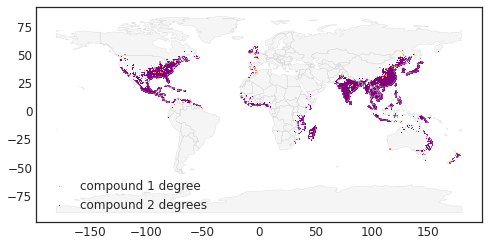

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.3)


gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='coral', markersize=0.00001,marker='*', label='compound 1 degree')
ax.legend()

gdf = impact_combined_ordered['2']['assets'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.00001,marker='*', label='compound 2 degrees')
ax.legend()
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/figures/compound_map_binary_assets_cc.jpeg', dpi=1200)

/scratch/tmp.50161076.szelie/ipykernel_18627/1285225827.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


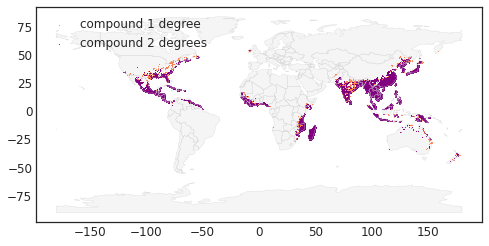

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.3)


gdf = impact_combined_ordered['2']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>0.1]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='coral', markersize=0.00001,marker='*', label='compound 1 degree')
ax.legend()

gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>0.1]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='purple', markersize=0.00001,marker='*', label='compound 2 degrees')
ax.legend()
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk/figures/compound_map_binary_pop_cc.jpeg', dpi=1200)

## Map of where TC, RF and both occur on average

/scratch/tmp.50161076.szelie/ipykernel_18627/379084472.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu


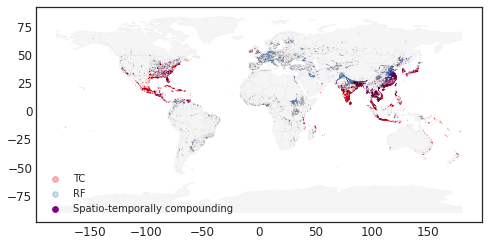

In [25]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)


gdf = impacts_yearsets['1']['assets']['TC']._build_exp().gdf
gdf = gdf[gdf.value>1000]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='red', markersize=0.0001,marker='.', label='TC', alpha=0.3)

gdf = impacts_yearsets['1']['assets']['RF']._build_exp().gdf
gdf = gdf[gdf.value>1000]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='steelblue', markersize=0.0001,marker='.', label='RF', alpha=0.3)


gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>1000]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Spatio-temporally compounding')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]
lgnd.legendHandles[1]._sizes = [130]
lgnd.legendHandles[2]._sizes = [130]
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_assets.jpeg', dpi=1600)

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)


gdf = impacts_yearsets['1']['pop']['TC']._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='red', markersize=0.0001,marker='.', label='TC', alpha=0.3)

gdf = impacts_yearsets['1']['pop']['RF']._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='steelblue', markersize=0.0001,marker='.', label='RF', alpha=0.3)


gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>10]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Spatio-temporally compounding')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]
lgnd.legendHandles[1]._sizes = [130]
lgnd.legendHandles[2]._sizes = [130]
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_pop.jpeg', dpi=1600)

/scratch/tmp.50161076.szelie/ipykernel_18627/1886666646.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


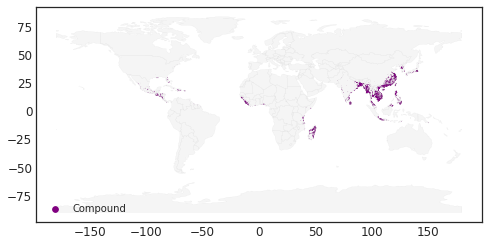

In [39]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>10]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Compound')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]

#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_pop.jpeg', dpi=1600)

/scratch/tmp.50161076.szelie/ipykernel_18627/3421241235.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


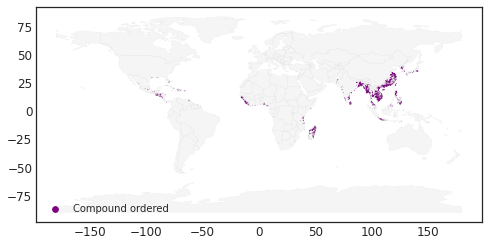

In [27]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>10]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Compound ordered')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]

#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_pop.jpeg', dpi=1600)

## --> no visilble difference between ordered or not on the previous maps, lets plot the difference now

In [29]:
gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['1']['pop'][('TC','RF')]._build_exp().gdf

In [40]:
mask

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 8847256    False
 8847257    False
 8847258    False
 8847259    False
 8847260    False
 Name: value, Length: 8847261, dtype: bool]

/scratch/tmp.50161076.szelie/ipykernel_18627/2873409686.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

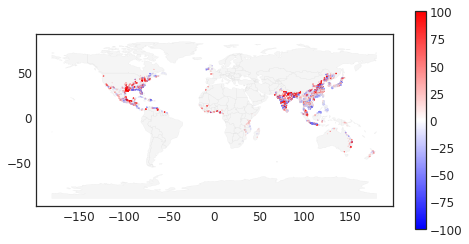

In [41]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import colors


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined_ordered['2']['assets'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['2']['assets'][('TC','RF')]._build_exp().gdf
mask = gdf.value>1000
gdf2 = gdf2[mask]
gdf = gdf[mask]

gdf['value'] = 100*(gdf['value'] -  gdf2['value'])/gdf2['value']
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
divnorm=colors.TwoSlopeNorm(vmin=-100., vcenter=0., vmax=100)

gdf.plot('value', ax=ax, markersize=0.01,marker='.', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)
# lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
# lgnd.legendHandles[0]._sizes = [130]

#plt.savefig('/Users/szelie/Desktop/compare_map_compound_pop.jpeg', dpi=1600)

## --> blue areas are where there are less compounding impacts when ordering the events (same driving climate model data), red is where it is higher

## some tests by country:

/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/scratch/tmp.50161076.szelie/ipykernel_18627/2434462644.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/scratch/tmp.50161076.szelie/ipykernel_1

<AxesSubplot:>

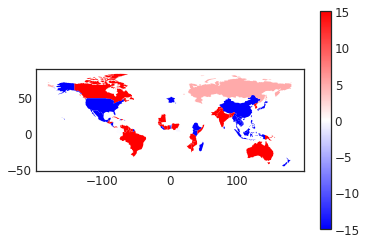

In [31]:
gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['1']['pop'][('TC','RF')]._build_exp().gdf
mask = gdf.value>1
gdf2 = gdf2[mask]
gdf = gdf[mask]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf2 = gpd.GeoDataFrame(gdf2, geometry=gpd.points_from_xy(gdf2.longitude, gdf2.latitude))



gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
gpd_countries = gpd_countries.groupby('iso_a3').agg('sum').reset_index()
gpd_countries = gpd_countries.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

gpd_countries2 = gpd.sjoin(gdf2, world, how="inner", op='within')
gpd_countries2 = gpd_countries2.groupby('iso_a3').agg('sum').reset_index()
gpd_countries2 = gpd_countries2.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

gpd_countries['value'] = gpd_countries['value'] - gpd_countries2['value']
gpd_countries = gpd.GeoDataFrame(gpd_countries, geometry=gpd_countries['geometry'])

ivnorm=colors.TwoSlopeNorm(vmin=-1500., vcenter=0., vmax=1500)

gpd_countries.plot('value', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)


In [144]:
gpd_countries[gpd_countries.iso_a3=='MOZ']

,iso_a3,value,latitude,longitude,index_right,pop_est,gdp_md_est,geometry
41,MOZ,-10334.714124,-267.666667,707.083333,1296,546588648.0,275238,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439..."


/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/scratch/tmp.50161076.szelie/ipykernel_18627/3499961587.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/scratch/tmp.50161076.szelie/ipykernel_1

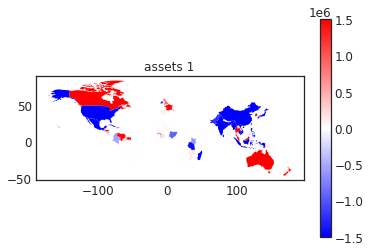

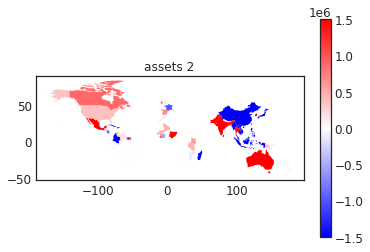

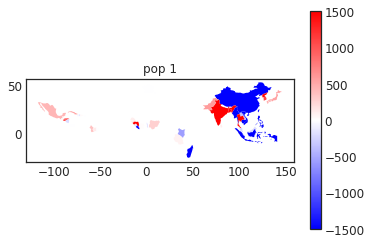

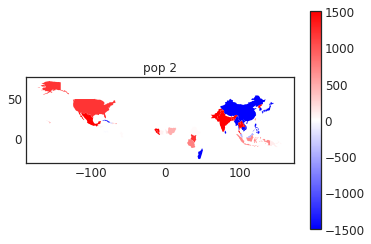

In [32]:
for exp in ['assets','pop']:
    for temp in ['1','2']:

        gdf = impact_combined_ordered[temp][exp][('TC','RF')]._build_exp().gdf
        gdf2 = impact_combined[temp][exp][('TC','RF')]._build_exp().gdf
        mask = gdf.value>100
        gdf2 = gdf2[mask]
        gdf = gdf[mask]
        gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
        gdf2 = gpd.GeoDataFrame(gdf2, geometry=gpd.points_from_xy(gdf2.longitude, gdf2.latitude))



        gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
        gpd_countries = gpd_countries.groupby('iso_a3').agg('sum').reset_index()
        gpd_countries = gpd_countries.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

        gpd_countries2 = gpd.sjoin(gdf2, world, how="inner", op='within')
        gpd_countries2 = gpd_countries2.groupby('iso_a3').agg('sum').reset_index()
        gpd_countries2 = gpd_countries2.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

        gpd_countries['value'] = gpd_countries['value'] - gpd_countries2['value']
        gpd_countries = gpd.GeoDataFrame(gpd_countries, geometry=gpd_countries['geometry'])
        gpd_countries = gpd_countries[gpd_countries['iso_a3']!='RUS']
        if exp=='assets':
            divnorm=colors.TwoSlopeNorm(vmin=-1500000., vcenter=0., vmax=1500000)
        else:
            divnorm=colors.TwoSlopeNorm(vmin=-1500., vcenter=0., vmax=1500)
     

        gpd_countries.plot('value', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)
        plt.title(exp+" "+temp)

In [164]:
impact_combined_ordered['1']['assets'][('TC','RF')].at_event[impact_combined_ordered['1']['assets'][('TC','RF')].event_name=='2007_gfdl-esm2m_rcp26_54']


array([], shape=(0, 5350), dtype=float64)

In [198]:
impact_combined_ordered['1']['assets'][('TC','RF')].aai_agg

8065040365.180067

In [199]:
impact_combined['1']['assets'][('TC','RF')].aai_agg

8885801692.969856

In [21]:
aai_single_hazard = {warming:{exp:{hazard: impacts_yearsets[warming][exp][hazard].aai_agg 
                                  for hazard in impacts_yearsets[warming][exp]} for 
                            exp in impacts_yearsets[warming]} for warming in impacts_yearsets}

aai_ord = {warming:{exp:{combi: impact_combined_ordered[warming][exp][combi].aai_agg 
                                  for combi in impact_combined_ordered[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}

y100_single_hazard = {warming:{exp:{hazard: impacts_yearsets[warming][exp][hazard].calc_freq_curve().impact[impacts_yearsets[warming][exp][hazard].calc_freq_curve().return_per>100][0] 
                                  for hazard in impacts_yearsets[warming][exp]} for 
                            exp in impacts_yearsets[warming]} for warming in impacts_yearsets}

y100_aai_ord = {warming:{exp:{combi: impact_combined_ordered[warming][exp][combi].calc_freq_curve().impact[impact_combined_ordered[warming][exp][combi].calc_freq_curve().return_per>100][0] 
                                  for combi in impact_combined_ordered[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}

y100_aai = {warming:{exp:{combi: impact_combined[warming][exp][combi].calc_freq_curve().impact[impact_combined[warming][exp][combi].calc_freq_curve().return_per>100][0] 
                                  for combi in impact_combined_ordered[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}

aai = {warming:{exp:{combi: impact_combined[warming][exp][combi].aai_agg 
                                  for combi in impact_combined[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}


In [22]:
rel_change_dict = {warming:{exp:{hazard: (np.median(aai_single_hazard[warming][exp][hazard]) - np.median(aai_single_hazard['1'][exp][hazard]))/np.median(aai_single_hazard['1'][exp][hazard])\
    for hazard in aai_single_hazard[warming][exp]} for exp in aai_single_hazard[warming]} \
    for warming in aai_single_hazard}   

rel_change_dict_combined = {warming:{exp:{hazard: (np.median(aai_ord[warming][exp][hazard]) - np.median(aai_ord['1'][exp][hazard]))/np.median(aai_ord['1'][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}   

rel_change_dict_100y = {warming:{exp:{hazard: (np.median(y100_single_hazard[warming][exp][hazard]) - np.median(y100_single_hazard['1'][exp][hazard]))/np.median(y100_single_hazard['1'][exp][hazard])\
    for hazard in aai_single_hazard[warming][exp]} for exp in aai_single_hazard[warming]} \
    for warming in aai_single_hazard}   

rel_change_dict_combined_100y = {warming:{exp:{hazard: (np.median(y100_aai_ord[warming][exp][hazard]) - np.median(y100_aai_ord['1'][exp][hazard]))/np.median(y100_aai_ord['1'][exp][hazard])\
     for hazard in y100_aai_ord[warming][exp]} for exp in y100_aai_ord[warming]} \
     for warming in y100_aai_ord}       



            

In [23]:
rel_diff_dict_combined_ord = {warming:{exp:{hazard: (np.median(aai[warming][exp][hazard]) - np.median(aai_ord[warming][exp][hazard]))/np.median(aai_ord[warming][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}   

In [24]:
rel_diff_dict_100y_ord = {warming:{exp:{hazard: (np.median(y100_aai[warming][exp][hazard]) - np.median(y100_aai_ord[warming][exp][hazard]))/np.median(y100_aai_ord[warming][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}  

In [25]:
rel_diff_dict_100y_ord

{'1': {'assets': {('TC', 'RF'): 0.11907506444353803},
  'pop': {('TC', 'RF'): 0.3558179838224222}},
 '2': {'assets': {('TC', 'RF'): 0.08521135175319358},
  'pop': {('TC', 'RF'): 0.06182037713486955}}}

In [26]:
y100_aai_ord

{'1': {'assets': {('TC', 'RF'): 63626008033.82122},
  'pop': {('TC', 'RF'): 30410160.3666937}},
 '2': {'assets': {('TC', 'RF'): 82561875960.43356},
  'pop': {('TC', 'RF'): 38776544.11983393}}}

In [27]:
rel_change_dict_combined

{'1': {'assets': {('TC', 'RF'): 0.0}, 'pop': {('TC', 'RF'): 0.0}},
 '2': {'assets': {('TC', 'RF'): 0.3977277028881242},
  'pop': {('TC', 'RF'): 0.2882667730981572}}}

In [28]:
rel_change_dict_combined_100y

{'1': {'assets': {('TC', 'RF'): 0.0}, 'pop': {('TC', 'RF'): 0.0}},
 '2': {'assets': {('TC', 'RF'): 0.29761206952582564},
  'pop': {('TC', 'RF'): 0.27511804121570477}}}